In [1]:
import time, matplotlib.pyplot as mplot
from google.colab import output
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [2]:
request = []
verticalAxis = []
algorithm = []
queue = []
srs_1 = []
srs_2 = []
high = []
low  = [] 
first = 0
second = 0
i = 0 
lim = 0 
head = 0
total = 0 
entry = 0
Validate = False
dir = '' 

def resetVars():
  global request, verticalAxis, algorithm, queue, srs_1, srs_2, i, lim, head, total, Validate, dir, high, low, entry

  request = []
  verticalAxis = []
  algorithm = []
  queue = []
  srs_1 = []
  srs_2 = []
  high = []
  low = []
  first = 0
  second  = 0
  i = 0 
  lim = 0 
  head = 0
  total = 0 
  entry = 0
  Validate = False
  dir = '' 

In [76]:
def getInput ():
  global request, verticalAxis, i, lim, head, total, Validate, dir, entry 
  resetVars()
  
  while lim < 100 or lim > 500:

    lim = int (input('Range upper limit(100-500): '))
    if (lim >= 100 and lim <= 500 ): break
    else: 
      print('Number must be within 100 to 500')
      time.sleep(1)
      continue
  
  while not(Validate):
    i = 0
    request = input('Enter queue (separated by spaces):')
    for ent in request.split():
      temp = int(ent)
      if (temp > 0 and temp < lim-1): i += 1
      if (i == len(request.split())): Validate = True
    if (i >= 10 and Validate): 
      for ent in range(1, i+2): verticalAxis.append(ent)
    else:
        print('Please enter a valid number')
        time.sleep(1)
        print('Range: ', lim - 1)
        continue
      
  while not dir:
    print('Directions: \n 1 Left \t 2 Right')
    u_choice = int(input('Enter direction(1-2): '))
    if  (u_choice == 1): dir = 'LEFT'
    elif(u_choice == 2): dir = 'RIGHT'
    else:
      ('Please enter a valid number')
      time.sleep(1)
      output.clear()
      continue
  head = int(input('Enter head value: '))
  request = [int(num) for num in request.split()]

def fcfs():
  global head, request, i, total, algorithm, queue, srs_1, srs_2

  total = 0
  x = 1
  
  if head > request[0]: temp = head - request[0]
  else: 
    temp = request[0] - head
    algorithm.append(temp)

  while x < i:
    z = request[x]
    y = request[(x-1)]
    if x < i:
      if y > z: algorithm.append(y - z)
      elif y < z: algorithm.append(z - y)
    elif (x >= 10): break
    x += 1
  queue.append(head)
  for ent in request:
    queue.append(ent)

  for i in range(len(algorithm)):
    total += algorithm[i]
   
def sstf():
  global head, request, i, total, algorithm, queue, srs_1, srs_2, high, low, first, second

  total = 0 
  previous = 0
  current  = 0
  next     = 0
  h_I = 0
  l_I = 0
  lowPrev = False
  hiPrev  = False
  srs_1 = request
  srs_1.sort()

  for ent in srs_1:
    if(head > ent): low.append(ent)
    else: high.append(ent)
  
  queue.append(head)
  low.sort(reverse = True)
  high.sort()
  current = head
  previous= low[l_I]
  next    = high[h_I]

  for num in range(i):
    if(current - previous < next - current):
      srs_2.append(previous)
      current = previous

      if(l_I < len(low) - 1):
        l_I += 1
        previous = low[l_I]
      else: 
        lowPrev = True
        break
    else: 
      srs_2.append(next)
      current = next
      
      if(h_I < len(high) - 1):
        h_I += 1
        next = high[h_I]
      else:
        lowPrev = True
        break
  if(lowPrev): 
    for num in range(h_I, len(high)):srs_2.append(high[num])
  else:
    for num in range(l_I, len(low)):srs_2.append(low[num])

  for num in srs_2: queue.append(num)

  first = head
  for variable in srs_2:
    second = variable
    if (first >= second): algorithm.append(first - second)
    else: algorithm.append(second - first)
    first = second

  for i in range(len(srs_2)): total += algorithm[i]
  if (len(verticalAxis) > len(queue)): verticalAxis.pop()

def scan():
  global head, request, i, total, algorithm, queue, verticalAxis, srs_1, srs_2, high, low, first, second, entry, dir

  srs_1 = request
  srs_1.sort()


  verticalAxis = []
  for ent in srs_1:
    if(head > ent): low.append(ent)
    else: high.append(ent)
  low.sort(reverse = True)
  high.sort()
  queue.append(head)

  entry = low + high
  if (dir == 'LEFT'):
    for x in range(len(low)): queue.append(high[x])
    if(all(item in queue for item in srs_1) == False): queue.append(0)
    for x in range(len(high)): queue.append(high[x])
  else:
    for x in range(len(high)): queue.append(high[x])
    if(all(item in queue for item in srs_1) == False): queue.append(lim -1)
    for x in range(len(low)): queue.append(low[x])
  
  first = head
  for ent in entry:
    second = ent
    if(first >= second): algorithm.append(first - second)
    else: algorithm.append(second - first)
    first = second

  for ent in range(1, len(queue) + 1): verticalAxis.append(ent)
  for i in range(len(entry)): total += algorithm[i] 

def cscan():
  global head, request, i, total, algorithm, queue, verticalAxis, srs_1, srs_2, high, low, first, second, entry

  verticalAxis = []
  srs_1 = request
  srs_1.sort()

  for ent in range(i):
    if (head > ent): high.append(srs_1[ent])
    else: low.append(srs_1[ent])

  low.sort()
  high.sort()
  queue.append(head)

  if (dir == 'RIGHT'):
    middle = high + low

    for x in range(len(low)): queue.append(low[x])
    if (all(item in queue for item in srs_1) == False):
      queue.append(lim - 1)
      queue.append(0)
    for x in range(len(high)): queue.append(high[x])
  
  else:
    high.sort(reverse = True)
    low.sort(reverse = True)

    middle = high + low

    for x in range(len(high)): queue.append(high[x])
    if (all(item in queue for item in request) == False):
      queue.append(0)
      queue.append(lim-1)
    for x in range(len(low)): queue.append(low[x])
  
  for x in range(1, len(queue)+1):verticalAxis.append(x)

  first = head
  for ent in middle:
    second = ent
    if (first >= second): algorithm.append(first - second)
    else: algorithm.append(second - first)
    first = second
  
  for x in range(len(algorithm)):
    total += algorithm[x]

def look():
  global head, request, i, total, algorithm, queue, verticalAxis, srs_1, srs_2, high, low, first, second, entry

  srs_1 = request
  srs_1.sort
  verticalAxis = []
  for ent in srs_1:
    if(head > ent): low.append(ent)
    else: high.append(ent)
  
  low.sort(reverse = True)
  high.sort()
  queue.append(head)

  entry = low + high
  
  for ent in entry:
    queue.append(ent)

  first = head
  for ent in entry:
    second = ent
    if(first >= second):
      algorithm.append(first - second)
    else:
      algorithm.append(second - first)
    first = second

  for ent in range(1, len(queue)+1):verticalAxis.append(ent)
  for i in range(len(entry)): total += algorithm[i]

def showPlot(algo):
  global head, request, verticalAxis, i, total, algorithm
   
  locSeek = 0
  loctvse = []

  fig, ax = mplot.subplots(figsize=(10, 10))
  ax.set_xlim(0, lim-1)
  ax.set_ylim(0, len(verticalAxis)+1)
  ax.xaxis.set_major_locator(MultipleLocator(lim/10))
  ax.yaxis.set_major_locator(MultipleLocator(1))
  ax.xaxis.set_minor_locator(AutoMinorLocator(2))
  ax.yaxis.set_minor_locator(AutoMinorLocator(2))
  ax.xaxis.tick_top()
  ax.xaxis.set_label_position('top')
  mplot.gca().invert_yaxis()
  mplot.plot(queue, verticalAxis, color='c', marker='o')

  if (algo == 1):mplot.title('FCFS Disk Scheduling Algorithm')
  elif (algo == 2):mplot.title('SSTF Disk Scheduling Algorithm')
  elif (algo == 3):mplot.title('SCAN Disk Scheduling Algorithm')
  elif (algo == 4):mplot.title('CSCAN Disk Scheduling Algorithm')
  elif (algo == 5):mplot.title('LOOK Disk Scheduling Algorithm')
  else: 
    print('Please enter a valid number!')
  mplot.grid(True)
  mplot.gca().axes.get_yaxis().set_visible(False)
  mplot.show()
  print("Total Seek Time: ", total)
  print("Average Seek Time: ", total / len(algorithm))

def runProgram():
  print('=============================')
  print('\n Enter values:\n')
  getInput()  
  print('=============================')
  print('\nAlgorithms:\n 1 - FCFS \t 2 - SSTF \n 3 - SCAN \t 4 - CSCAN\n 5 - LOOK \n')
  while (True):
    u_algo = int(input('Algorithm selected (num): '))
    if (u_algo > 0 and u_algo < 6):
      break
    else: print('Please enter a valid number!')
  print('\n=============================')
  print('Results: \n')
  if (u_algo == 1):
    fcfs()
    showPlot(u_algo)
  elif (u_algo == 2):
    sstf()
    showPlot(u_algo)
  elif (u_algo == 3):
    scan()
    showPlot(u_algo)
  elif (u_algo == 4):
    cscan()
    showPlot(u_algo)
  elif (u_algo == 5):
    look()
    showPlot(u_algo)

def Program():
  while (True):
    runProgram()
    if (not tryAgain()):
      break
  print('Thank you for using AlgoCal!')     

def tryAgain():
  while(True):

    u_choice = input('Return to main menu? [Y/N]: ')
    if (u_choice == 'Y' or u_choice == 'y'):
      return True
      break
    elif (u_choice == 'N' or u_choice == 'n'):
      return False
      break
    else:
      print('Please enter a valid repsponse.')


 Enter values:

Range upper limit(100-500): 300
Enter queue (separated by spaces):214 150 16 60  100 208 187 90  99  134
Directions: 
 1 Left 	 2 Right
Enter direction(1-2): 2
Enter head value: 100

Algorithms:
 1 - FCFS 	 2 - SSTF 
 3 - SCAN 	 4 - CSCAN
 5 - LOOK 

Algorithm selected (num): 1

Results: 



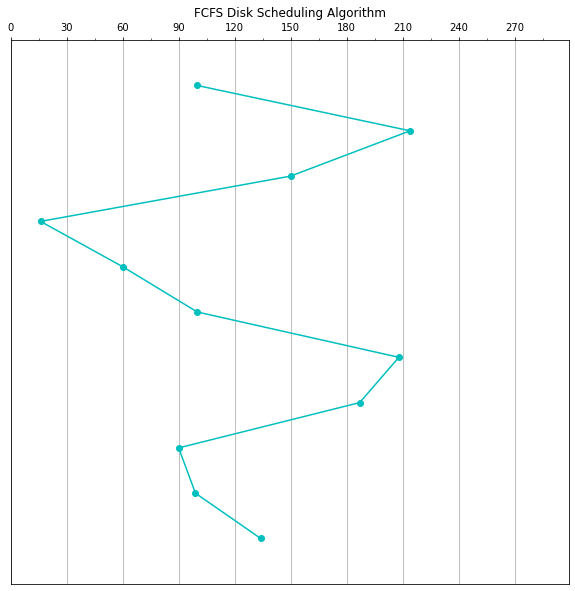

Total Seek Time:  666
Average Seek Time:  66.6
Return to main menu? [Y/N]: n
Thank you for using AlgoCal!


In [71]:
#FCFS
Program()


 Enter values:

Range upper limit(100-500): 300
Enter queue (separated by spaces):214 150 16 60  100 208 187 90  99  134
Directions: 
 1 Left 	 2 Right
Enter direction(1-2): 1
Enter head value: 100

Algorithms:
 1 - FCFS 	 2 - SSTF 
 3 - SCAN 	 4 - CSCAN
 5 - LOOK 

Algorithm selected (num): 2

Results: 



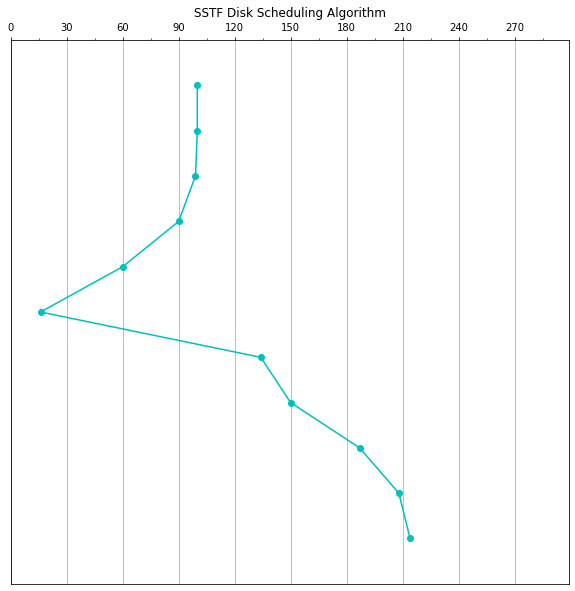

Total Seek Time:  282
Average Seek Time:  28.2
Return to main menu? [Y/N]: n
Thank you for using AlgoCal!


In [74]:
#SSTF
Program()


 Enter values:

Range upper limit(100-500): 300
Enter queue (separated by spaces):214 150 16 60  100 208 187 90  99  134
Directions: 
 1 Left 	 2 Right
Enter direction(1-2): 1
Enter head value: 100

Algorithms:
 1 - FCFS 	 2 - SSTF 
 3 - SCAN 	 4 - CSCAN
 5 - LOOK 

Algorithm selected (num): 3

Results: 



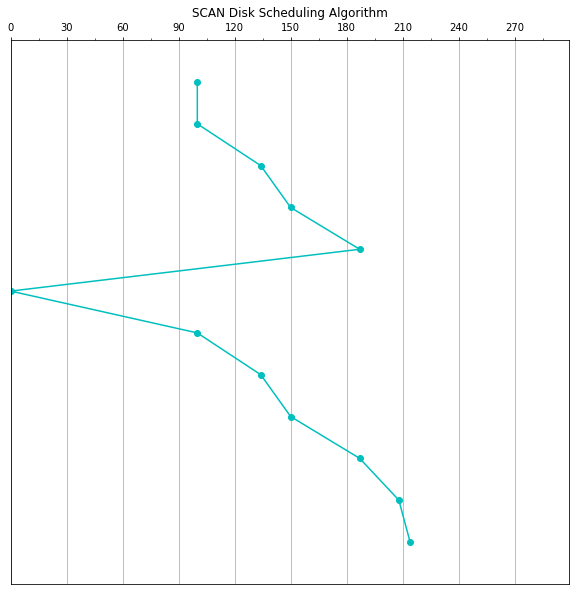

Total Seek Time:  282
Average Seek Time:  28.2
Return to main menu? [Y/N]: n
Thank you for using AlgoCal!


In [77]:
#SCAN
Program()


 Enter values:

Range upper limit(100-500): 300
Enter queue (separated by spaces):214 150 16 60  100 208 187 90  99  134
Directions: 
 1 Left 	 2 Right
Enter direction(1-2): 2
Enter head value: 100

Algorithms:
 1 - FCFS 	 2 - SSTF 
 3 - SCAN 	 4 - CSCAN
 5 - LOOK 

Algorithm selected (num): 4

Results: 



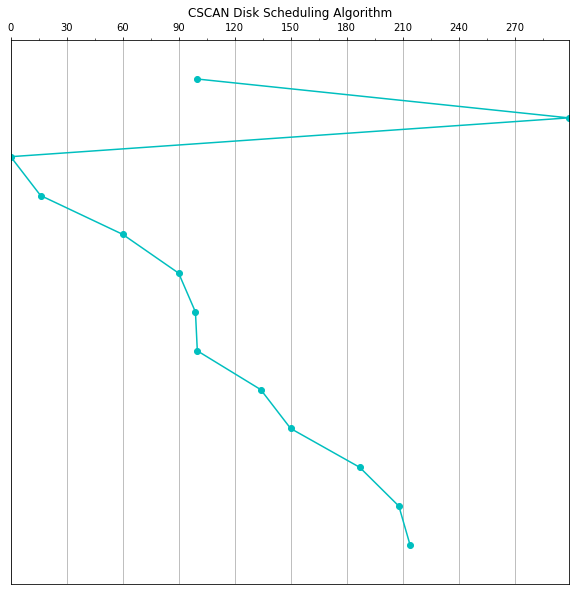

Total Seek Time:  282
Average Seek Time:  28.2
Return to main menu? [Y/N]: n
Thank you for using AlgoCal!


In [78]:
#CSCAN
Program()


 Enter values:

Range upper limit(100-500): 300
Enter queue (separated by spaces):214 150 16 60  100 208 187 90  99  134
Directions: 
 1 Left 	 2 Right
Enter direction(1-2): 1
Enter head value: 100

Algorithms:
 1 - FCFS 	 2 - SSTF 
 3 - SCAN 	 4 - CSCAN
 5 - LOOK 

Algorithm selected (num): 5

Results: 



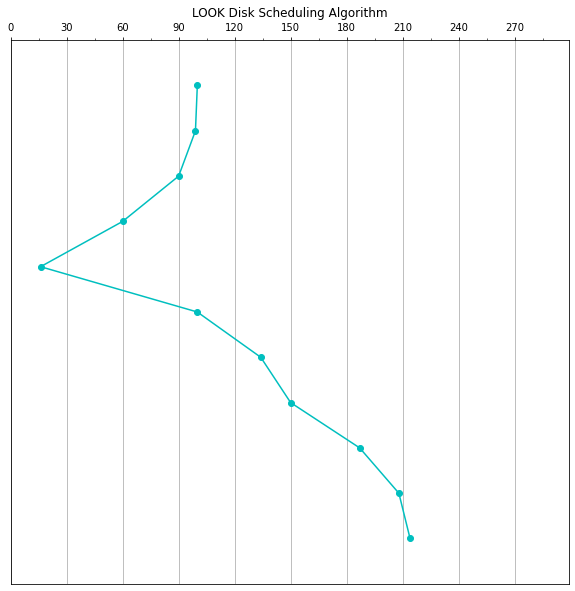

Total Seek Time:  282
Average Seek Time:  28.2
Return to main menu? [Y/N]: n
Thank you for using AlgoCal!


In [79]:
#LOOK
Program()